This notebook summarizes and implements the results from [Two-qubit Circuit Depth and the Monofromy Polytope](https://arxiv.org/abs/1904.10541) by Eric Peterson et al.

### 3. The multiplicative eigenvalue problem and the monodromy polytope

**Definition 7.** The group $PU(n)$ is the quotient of $U(n)$ by its center $e^{i\theta}I$. Thus $PU(n)$ are unitary matrices up to global phase.

**Problem 8.** Let $\mathcal{S}$ be a set of two-qubit gates.

1. Describe the subspace $P^n_\mathcal{S} \subseteq PU(4),$ of $(A_n \otimes B_n) \ S_n \ \cdots \ (A_1 \otimes B_1) \ S_1 \ (A_0 \otimes B_0)$ for $S_j \in \mathcal{S}$ and $A_j, B_j \in PU(2)$.

2. Given $G \in P_\mathcal{S}^n$, algorithmically produce local gates $A_j, B_j$ which realize $G$ as such a circuit.

**Definition 9.** Let $\mathcal{L}_\mathcal{S}(U)$ be the minimum number of two-qubit gates appearing in any circuit implementation of $U$ using the gate set $\mathcal{S}$. We define the *expected circuit depth* of $\mathcal{S}$ to be 

\begin{align*} \langle \mathcal{L}_\mathcal{S}\rangle^\text{Haar} 
&= \int_{U \in PU(4)} \mathcal{L}_\mathcal{S}(U)d\mu \\
&= \sum_{n =0}^\infty n \cdot \text{vol}^\text{Haar} \left(\mathcal{L}_\mathcal{S}^{-1}(n)\right) \\
&= \sum_{n =0}^\infty n \cdot \text{vol}^\text{Haar} \left(P_\mathcal{S}^n \setminus \bigcup_{j=0}^{n-1}P_\mathcal{S}^j\right).\end{align*}

**Problem 10.** Let $E$ and $F$ be fixed two-qubit gates. This is the case $n=2$.

1. Describe the subspace $P \subseteq PU(4),$ of $(A_3 \otimes B_3) \ F \ (A_2 \otimes B_2) \ E \ (A_1 \otimes B_1)$ for $A_1, B_1, A_2, B_2, A_3, B_3 \in PU(2)$.


2. Given $G \in P$, algorithmically produce local gates $A_1, A_2, A_3, B_1, B_2$ and $B_3$ which realize $G$ as such a circuit.

This problem is well-known in representation theory as the *multiplicative eigenvalue problem*, whose solution comes in the form of the *monodromy polytope*.

**Reduction 10.5.** We want a compact description of the set of canonical parameter of $P$. To do so, we compute the spectrum of the Cartan double $\gamma(G^Q)$. 

We have $G^Q = O_1E^QO_2F^QO_3$ where $O_j$ are orthogonal matrices. In turns, $E^Q$ and $F^Q$ have orthogonal decomposition

$$E^Q = O_{E, L}D_EO_{E, R}, \quad F^Q = O_{F, L}D_FO_{F, R},$$

where $D_E$ and $D_F$ are diagonal and $O_{E, L}, O_{E, R}, O_{F, L}, O_{F, R}$ are all orthogonal. Combining these decompositions yields

$$G^Q = O_1O_{E, L}\cdot (\mathbf{D_E}) \cdot O_{E, R}O_2O_{F, L} \cdot (\mathbf{D_F}) \cdot O_{F, R}O_3,$$

from which we compute

\begin{align*}\gamma(G^Q) 
&= \left(O_1O_{E, L}\cdot (\mathbf{D_E}) \cdot O_{E, R}O_2O_{F, L} \cdot (\mathbf{D_F}) \cdot O_{F, R}O_3\right)\left(O_1O_{E, L}\cdot (\mathbf{D_E}) \cdot O_{E, R}O_2O_{F, L} \cdot (\mathbf{D_F}) \cdot O_{F, R}O_3\right)^T \\
&= O_1O_{E, L}\cdot (\mathbf{D_E}) \cdot O_{E, R}O_2O_{F, L} \cdot (\mathbf{D_F}^2) \cdot O_{F, L}^TO_2^TO_{E, R}^T \cdot (\mathbf{D_E}) \cdot O_{E, L}^T O_1^T \\
&= U \cdot (\mathbf{D_E}^2) \cdot O \cdot (\mathbf{D_F}^2) \cdot O^T \cdot U^\dagger \\
&\sim (\mathbf{D_E}^2) \cdot O \cdot (\mathbf{D_F}^2)O^T,
\end{align*}

where $O = O_{E, R}O_2O_{F, L}$ and $U = O_1O_{E, L}D_E$. This reduces Problem 10 to

**Problem 11.** Let $D_E$ and $D_F$ be fixed diagonal special unitary matrices.

1. Calculate the possible spectra of operators of the form $(\mathbf{D_E}^2) \cdot O \cdot (\mathbf{D_F}^2) \cdot O^T$ as $O$ ranges over all orthogonal matrices. 

As $G$ ranges over $P$ (as the local gates vary), the terms $O$ range over $PO(4)$.

2. Given a particular such operator spectrum $D_G$, calculate an orthgonal matrix $O$ such that $(\mathbf{D_E}^2) \cdot O \cdot (\mathbf{D_F}^2) \cdot O^T$ diagonalizes to give $D_G^2$.

Given $O$ so that $(\mathbf{D_E}^2) \cdot O \cdot (\mathbf{D_F}^2)O^T$ has the prescribed operator spectrum, we
find $A_2, B_2$ such that 

$$(A\otimes B_2)^Q O_{E, R}^T OO^T_{F, R}.$$

Then $E(A\otimes B_2)F$ has the prescribed canonical parameters.

**Problem 12.** Let $U_1, U_2$ and $U_3$ be unitary operators.

1. *Multiplicative eigenvalue problem*: Describe the possible spectra of all triples $U_1, U_2, U_3$ satisfying $U_1U_2U_3 = I$

**Reduction**: Given $D_E, D_F$ and $D_G$ and $O$, satisfying the similarlity relation above, there must exist a unitary $U$ satisfying

$$\gamma^Q(G) = O_{G, L}(\mathbf{D_G}^2)O_{G, L}^T \sim (\mathbf{D_E}^2) \cdot O \cdot (\mathbf{D_F}^2)O^T$$

or 

$$U^\dagger(\mathbf{D_G}^2)U = (\mathbf{D_E}^2) \cdot O \cdot (\mathbf{D_F}^2)O^T,$$

which can be rewritten as 

$$I = \mathbf{D_E}^2 \cdot \left(O \cdot (\mathbf{D_F}^2) \cdot O^T\right) \cdot \left(U^\dagger\cdot (\mathbf{D_G}^2)^\dagger \cdot U\right) = U_1U_2U_3.$$

This shows that the spectra of $D_E^2$ and $D_F^2$ agree with those of $U_1$ and $U_2$ and the spectrum of $D_G^2$ agrees with that of $U_3^\dagger.$


2. *Effective saturation problem*: Given a triple of operator spectra satisfying the conditions of Problem 12.1, algorithmically produce $U_1, U_2$ and $U_3$ realizing these spectra and satisfying $U_1U_2U_3=I$.

**Solution**: This is a non-trivial result in sympletic geometry:

**Theorem 13.** Suppose that $D_1, D_2, D_3$ are diagonal operators which satisfy the conditions of Problem 12.1. Then there exists operators $V_1, V_2, V_3$ which diagonalize to $D_1, D_2, D_3$, which satisfy $V_1V_2V_3=1$ and for which $V_1$ and $V_2$ are orthogonally diagonalizable, i.e., 

$$V_1 = O_1^TD_1O_1, \quad V_2 = O_2^TD_2O_2,$$

for some orthgonal matrices $O_1, O_2$.

**Reduction**: This is a corollary of the above.

**Corollary 14.** For $U_1, U_2$ and $U_3$ unitaries satisfying $U_1U_2U_3=I$ and with diagonalization $D_E^2, D_F^2$ and $(D_G^2)^\dagger$ respectively, there exists an orthogonal $O$ and a unitary $U$ such that 

$$U^\dagger D_G^2 U = D_E^2OD_F^2O^T,$$

*Proof.* By applying the Theorem, we get

$$I = V_1V_2V_3 = (O_1^TD_E^2O_1)(O_2^TD_F^2O_2)V_3.$$

so

$$U^\dagger D_G^2U = D_E^2 O D_F^2O^T,$$

where we have written $O = O_1O_2^T$ and $U = EO_1^T$ for $E$ a matrix with each column being an eigenbasis of $V_3^\dagger$.

**Example 15.** Let $U$ be a single-qubit operator with canonical decomposition $U = Z_\epsilon Y_\zeta Z_\eta$. What conditions on $\zeta$ such that $U$ admits expression as $U = Z_{\epsilon^\prime}Y_\alpha Z_\beta Y_\delta Z_{\eta^\prime}$ for fixed $\alpha, \delta$. We study the characteristic polynomial of the Cartan double $\gamma^{Q_1}(U)$. By Cayley-Hamilton,

\begin{align*}\chi(\gamma^{Q_1}(U)) &= z^2-\text{tr}(\gamma^{Q_1}(U))z +1 \\ \end{align*}

We have two ways to compute the trace:

$$2\cos\zeta = \text{tr}(\gamma^{Q_1}(U)) = 2(\cos\alpha\cos\delta - \cos\beta\sin\alpha\sin\delta).$$

Hence $\delta = \cos^{-1}(\cos\alpha\cos\delta - \cos\beta\sin\alpha\sin\delta)$.

The role of $\beta$ is thus to modulate the interference of $\alpha$ and $\delta$, and it imposes the following linear inequality on $\zeta$:

$$|\alpha-\delta| \leq \zeta \leq \pi - |\alpha+\delta- \pi|.$$

**Example 16.** In extremely favorable situations, the two-qubit case can also be manually analyzed. Let us consider the gate family 

$$\text{SWAP}_t = \exp\left(-2\pi it\left(\sigma_X^{\otimes 2} + \sigma_Y^{\otimes 2} + \sigma_Z^{\otimes 2}\right)\right),$$

for which $\gamma^Q(\text{SWAP}_t)$ has the spectrum

$$\left(e^{-i\frac{t}{4}}, e^{-i\frac{t}{4}}, e^{-i\frac{t}{4}}, e^{i\frac{3t}{4}}\right),$$

and let $E = \text{SWAP}_{t_1}$ and $F = \text{SWAP}_{t_2}$. Using reduction to Problem 12, we will describe the possible spectra for operators of the form

$$U_1 = V^\dagger D_{t_1}^2 V, \quad U_2 = D_{t_2}^2, \quad U_3 = U_1U_2.$$

where $D_{t_j}^2$ is the diagonal matrix form from the spectrum of $\gamma^Q(\text{SWAP}_{t_j})$ and $V$ is an arbitrary unitary.

First observe that the eigenspace of $\exp(-i\frac{t_j}{4})$ is $3$-dimensional, and hence the intersection of the eigenspaces for $\exp(-i\frac{t_1}{4})$ and $\exp(-i\frac{t_2}{4})$ is at least $2$-dimensional. It follows that there exists an orthonormal $2$-frame $\{b_1, b_2\}$ of eigenvectors for $U_3$:

$$U_3b_i = U_1U_2b_i = U_1e^{-i\frac{t_2}{4}}b_i = e^{-i\frac{t_1+t_2}{4}}b_i = \lambda b_i.$$

In particular, we find $U_3$ to be block-diagonal in the partial basis $\{b_1, b_2, b_3, b_4\}$:

$$U_3 = \begin{pmatrix} \lambda & & & \\ & \lambda & & \\ & & \ast & \ast \\ & & \ast & \ast \end{pmatrix}$$

where $b_3$ spans the complement of $\{b_1, b_2\}$ in the $3$-dimensional eigenspace for $U_2$ and $b_4$ spans
the $1$-dimensional eigenspace $e^{i\frac{3t_2}{4}}$. In this basis, the subblock denoting the action of $U_3$ on $B = \text{span}\{b_3, b_4\}$ is

\begin{align*}U_3|_B 
&= \begin{pmatrix}e^{-i\frac{t_1}{4}} & 0 \\ 0 & e^{i\frac{3t_1}{4}}\end{pmatrix}^W\begin{pmatrix}e^{-i\frac{t_2}{4}} & 0 \\ 0 & e^{i\frac{3t_2}{4}}\end{pmatrix}^W \\
&= \lambda^{-1}\begin{pmatrix}e^{-i\frac{t_1}{2}} & 0 \\ 0 & e^{i\frac{t_1}{2}}\end{pmatrix}^W\begin{pmatrix}e^{-i\frac{t_2}{2}} & 0 \\ 0 & e^{i\frac{t_2}{2}}\end{pmatrix}^W
\end{align*}

where $G^W$ denotes conjugation by $W$ and columns of $W$ are $b_3^\prime$ and $b_4^\prime$, which spans the complement of $\{b_1, b_2\}$ in $U_1$ and $b_4^\prime$ spans the $1$-dimensional eigenspace $e^{i\frac{3t_1}{4}}.$ The resulting operator spectra are shifted by $\lambda^{-1}$ of those in Examples 15, are hence subjected to the same inequalities also shifted by $\lambda^{-1}$.

**Definition 17.** For a special unitary matrix $U$, we may uniquely present its spectrum

$$\text{Spec} U = (e^{2\pi ia_1}, ..., e^{2\pi ia_n})$$

as

$$\text{LogSpec} U = (a_1, ..., a_n),$$

where $a_1 \geq ... \geq a_n \geq a_1-1, \quad a_+ := \sum_ja_j = 0.$

We refer to the collection of all such $n$-tuples as $\mathfrak{U}$, the *fundamental alcove* of $SU(n)$, and we will write $\text{LogSpec}$ for the associated point in $\mathfrak{U}$. 

Definition 17 is the natural target of the logarithmic spectrum of a special unitary operator:

$$\text{LogSpec}(-): SU(4) \to \mathfrak{U}$$

and it forms a convex polytope.

**Definition 18.** Let $C_2 \leq SU(4)$ be the finite central subgroup $\{\pm1\}$, and let $U \in SU(4) / C_2$ be a member of the quotient group, which we may present as a coset $(\pm 1) \cdot U = \{ \tilde{U}, -\tilde{U}\} \subseteq SU(4)$. The logarithmic spectra of these matrices 

$$a_\ast = \text{LogSpec }(\tilde{U}), \quad b_\ast = \text{LogSpec }(-\tilde{U})$$

are related by a form of rotation:

$$a_\ast = \rho(b_\ast) := \left(b_3 + \frac{1}{2}, b_4 + \frac{1}{2}, b_1 - \frac{1}{2}, b_2-\frac{1}{2}\right).$$

We can also write

$$\rho(b_\ast) = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{pmatrix}\begin{pmatrix} b_1 \\ b_2 \\ b_3 \\ b_4 \end{pmatrix} + \frac{1}{2} \begin{pmatrix}1 \\ 1 \\ -1 \\ -1 \end{pmatrix} = (X \otimes I)b_\ast + \frac{1}{2}\begin{pmatrix} 1 \\ -1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 1 \end{pmatrix}.$$

Note that $\rho$ is an involution. 

**Lemma 17.5.** Since $\rho$ is an affine function, for $\sum_{i =1}^n \lambda_i = 1$, we have

$$\rho(\sum_{i =1}^n \lambda_ix_i) = \sum_{i=1}^n \lambda_i \rho(x_i).$$

In particular, if $\rho(x_i) = x_i$ then $\rho(\sum_{i =1}^n \lambda_ix_i) = \sum_{i =1}^n \lambda_ix_i$.

By appropriately picking either $\text{LogSpec }U = \text{LogSpec }\tilde{U}$ or $\text{LogSpec }\tilde{U}$, we see that we may uniquely specify a sequence $\text{LogSpec }U$ which further satisfies either

$$(\text{LogSpec }U)_3 + 1/2 > (\text{LogSpec }U)_1$$

or (these are equations of polytopes, similar to Weyl chamber)

$$\begin{cases} (\text{LogSpec }U)_3 + 1/2 = (\text{LogSpec }U)_1 \\ &\text{and} \\ (\text{LogSpec }U)_4 + 1/2 = (\text{LogSpec }U)_2\end{cases}$$

where $(\text{LogSpec }U)_j$ denotes the $j^\text{th}$ component of the quadruple of the $\text{LogSpec }U$. We similarly refer to the collection of all such quadruples as $\mathfrak{U}_{C_2}$, the fundamental alcove of $SU(4)/C_2$.

Definition is the natural target of the logarithmic spectrum of the Cartan double of a *projective* unitary operator:

$$\text{LogSpec } \ \gamma(-): PU(4) \to \mathfrak{U}_{C_2}$$

but it does not quite form a convex polytope: the closure $\overline{\mathfrak{U}_{C_2}}$ is a convex polytope, but the values $a_\ast$ satisfying $a_3 + 1/2 = a_1$ and $a_4 + 1/2 > a_2$, which constitute half a face of $\overline{\mathfrak{U}_{C_2}}$, are missing from $\mathfrak{U}_{C_2}$.

**Definition 20.** We are interested in the assignment

\begin{align*}\Pi: PU(4) 
&\to \mathfrak{U}_{C_2}, \\
U &\to \text{LogSpec } \ \gamma(U^Q),
\end{align*}

which we abbreviate to $\Pi(U).$ This is a way for us to organize canonical parameters.

In [1]:
from sympy import *
A = Matrix([[0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]])
b = 1/2 * Matrix([[1], [1], [-1], [-1]])

rho = lambda x: A@x + b

x1, x2, x3, x4 = symbols('x1, x2, x3, x4')

y1, y2, y3, y4 = symbols('y1, y2, y3, y4')

x = Matrix([[x1], [x2], [x3], [x4]])
y = Matrix([[y1], [y2], [y3], [y4]])

c1, c2 = symbols('c1, c2')

In [2]:
import numpy as np
from functools import reduce
epsilon = 1e-6  # Fraction(1, 1_000_000)

def Pi(unitary):
    """
    Given a unitary matrix, produces its alcove coordinate.
    """
    unitary = unitary * complex(np.linalg.det(unitary)) ** (-1 / 4)

    sysy = np.array([
        [0,  0,  0, 1],
        [0,  0, -1, 0],
        [0, -1,  0, 0],
        [1,  0,  0, 0],
    ], dtype=complex)
    gammaQ = reduce(np.dot, [unitary, sysy, unitary.T, sysy])
    logspec_coordinate = np.real(
        np.log(np.linalg.eigvals(gammaQ)) / (2 * np.pi * 1j))
    return normalize_logspec_AC2(
        sorted(np.mod(logspec_coordinate, 1.0), reverse=True)
    )

def normalize_logspec_A(coordinate):
    """
    Utility function for rotating a LogSpec tuple (targeting A)
    into its normal form.

    Expects a sorted input in the range [0, 1].
    """
    total = sum(coordinate)
    if total > epsilon:
        return normalize_logspec_A([*coordinate[1:], coordinate[0] - 1])
    elif total < -epsilon:
        raise ValueError(
            f"Over-rotated: {total}. I don't think this should happen."
        )
    else:
        return coordinate

def normalize_logspec_AC2(coordinate):
    """
    Utility function for rotating a LogSpec tuple (targeting A_{C_2})
    into its normal form.

    Expects a sorted input in the range [0, 1].
    """
    partially_normalized_coordinate = normalize_logspec_A(coordinate)
    if partially_normalized_coordinate[1] >= \
            -partially_normalized_coordinate[2]:
        return partially_normalized_coordinate
    else:
        return [partially_normalized_coordinate[2] + 1 / 2,
                partially_normalized_coordinate[3] + 1 / 2,
                partially_normalized_coordinate[0] - 1 / 2,
                partially_normalized_coordinate[1] - 1 / 2]
    
def rho(coordinate):
    return [coordinate[2] + 1 / 2, 
            coordinate[3] + 1 / 2, 
            coordinate[0] - 1 / 2,
            coordinate[1] - 1 / 2]

**Definition 21.** The extremal points of the polytope $\overline{\mathfrak{U}_{C_2}}$ lie at the following coordinates:

\begin{align*}
\Pi(\text{I}) &= e_1 = (0, 0, 0, 0) \\
\Pi(\text{CZ}) &= e_2 = \left(\frac{1}{4}, \frac{1}{4}, -\frac{1}{4}, -\frac{1}{4}\right), \\
\Pi(i\text{SWAP}) &= e_3 = \left(\frac{1}{2}, 0, 0, -\frac{1}{2}\right), \\
\Pi(\text{SWAP}) &=e_4 = \left(\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, -\frac{1}{4}\right), \\
\Pi(\sqrt{\text{SWAP}}) &= e_5 = \left(\frac{3}{8}, \frac{3}{8}, -\frac{1}{8}, -\frac{5}{8} \right), \\
\rho(e_5) &= e_6 = \left(\frac{3}{8}, -\frac{1}{8}, -\frac{1}{8}, -\frac{1}{8}\right).
\end{align*}

These coordinates gives the vertex representation of the convex polytope $\overline{\mathfrak{U}_{C_2}}$ (see wikipedia "Convex polytope"). The subspace of $\mathfrak{U}_{C_2}$ of $\overline{\mathfrak{U}_{C_2}}$ is given by deleting the subspace of convex combinations of $e_2, e_3$ and $e_6$ in which $e_6$ carries a nonzero coefficient.

**Definition 22.** For $r, k >0$ positive integers, let $\mathcal{Q}_{r, k}$ denote the following set of sequences (non-negative decreasing sequence of length $r$ bounded above by $k$): 

$$\mathcal{Q}_{r, k} = \{(I_1, ..., I_r) \in \mathbb{Z}^r \ | \ k \geq I_1 \geq ...\geq I_r \geq 0\}.$$



**Theorem 23.** Let $U_1, U_2, U_3 \in SU(n)$ satisfy $U_1U_2 = U_3$ (or $U_1U_2U_3^\dagger = I$), and let

\begin{align*}
\alpha_\ast &= \text{LogSpec } U_1, \\
\beta_\ast &= \text{LogSpec } U_2, \\
\gamma_\ast &= \text{LogSpec } U_3
\end{align*}

be the associated logarithmic spectra.

Select $r, k>0$ satisfying $r+k = n$, select sequences $a, b, c \in \mathcal{Q}_{r, k}$, and take number $d \geq 0$ so that the associated quantum Littlewood-Richardson coefficient $N^{c, d}_{ab}(r, k)$ satisfies $N^{c, d}_{ab}(r, k) = 1.$ The following inequality then holds:

$$d-\sum_{i=1}^r \alpha_{k+i-a_i} - \sum_{i=1}^r\beta_{k+i-b_i} + \sum_{i=1}^r\delta_{k+i-c_i} \geq0.$$

where $a_i$ denotes the $i^\text{th}$ entry of $a$ and $\alpha_j$ denotes the $j^\text{th}$ entry of $\alpha$. We define the monodromy polytope (for $SU(n)$) to be the polytope determined by all such inequalities.  Note that there is a further symmetry relation $N^{c, d}_{ab}(r, k) = N^{c, d}_{ba}(r, k).$

Conversely, given alcove sequences $\alpha_\ast, \beta_\ast, \delta_\ast$ which belong to the monodromy polytope, then there must exists $U_1, U_2, U_3$ satisfying $U_1U_2 = U_3$ and 

\begin{align*}
\alpha_\ast &= \text{LogSpec } U_1 \\
\beta_\ast &= \text{LogSpec } U_2 \\
\gamma_\ast &= \text{LogSpec } U_3 \\
\end{align*}

The "monodromy polytope" is just the polytope for $SU(n)$, we need to do special analysis to get polytope of  accessible space for specific gate set

In [3]:
delta = [symbols(f"delta_{i+1}") for i in range(4)]

def ineq(a, b, c, d, r, k, alpha, beta):
    inequality = d - sum([alpha[k+i-a[i]] for i in range(r)]) - sum([beta[k+i-b[i]] for i in range(r)]) + sum([delta[k+i-c[i]] for i in range(r)])
    
    return inequality

In [4]:
ineq(a = (1, 0), b = (2, 1), c = (1, 1), d = 0, r = 2, k = 2, alpha = (1/4, 1/4, -1/4, -1/4), beta = (1/4, 1/4, -1/4, -1/4))

delta_2 + delta_3

**Example 24.** Using the table of quantum Littlewood-Richardson coefficients in Figure 3, we compute the inequalities of the monodromy polytope of $PU(2)$:

Note that $PU(2) \cong SU(2)/C_2$ but under $\Pi$, $\Pi(PU(2)) \hookrightarrow SU(2)$. So in this example, there's no distinction between monodromy polytope for $PU(2)$ and $SU(2)$.

![IMG_EE8C9D829B68-1.jpeg](attachment:IMG_EE8C9D829B68-1.jpeg)

Since $n=2$, we have that $r, k = 1$.

- The first row gives us $\delta_2\geq \alpha_2+\beta_2.$

- The second row gives $\delta_1 \geq \alpha_1 + \beta_2$

- Switching $a$ and $b$ gives us $\delta_1 \geq \alpha_2 + \beta_1$.

- The third row gives us $\delta_2 \geq -1 + \alpha_1 + \beta_1.$

To put these inequalities in terms of $\alpha_1, \beta_1, \delta_1 \geq 0$, recall that $\alpha_1 +\alpha_2 = 0$ since we are working with $SU(n)$.

- $\delta_1 \leq \alpha_1 + \beta_1$ 
- $\delta_1 \geq \alpha_1 - \beta_1$
- $\delta_1 \geq -\alpha_1 + \beta_1$
- $\delta_1 \leq 1- (\alpha_1 + \beta_1).$

Compactly, we have

$$|\alpha_1 - \beta_1| \leq \delta_1 \leq \frac{1}{2} - \left|\alpha_1 + \beta_1 -\frac{1}{2}\right|.$$

So if we fix $\alpha$ and $\beta$, then $\delta$ will be restricted. If not, we get all of $SU(2)$. Accessible spaces of gatesets are just slices of the monodromy polytopes.

To study two-qubit programs, we have want to employ a variant of Theorem 23 that apply to $SU(4) / C_2$.

$$\Pi: PU(4) \xrightarrow{\gamma^{Q}} SU(4)/C_2 \xrightarrow{\text{LogSpec}} \mathfrak{U}_{C_2}.$$

**Corollary 25.** Theorem 23 holds for $SU(4)/C_2$, under the condition that the indicated family of inequalties all simultaneously hold either for $\delta_+ = \text{LogSpec }U_3$ or for $\delta_- = \rho(\text{LogSpec }U_3)$, which is to say, we choose the $\delta$ accordingly.

For $U_1U_2 \equiv (-1)^jU_3$, if $j$ is even then we use $\delta_+$ else if $j$ is odd we use $\delta_-$.

Theorem 23 and Corollary 25 solves Problem 10.1 (2 two-qubit gates). We can bootstrap it to solve Problem 8.1.

**Corollary 26.** Let $\mathcal{S}$ be a gate set whose image through $\Pi$ is a (finite) union of convex polytopes. The image of $P_\mathcal{S}^n$ through $\Pi$ is then also a (finite) union of convex polytopes.

*Proof.* We use induction. 

Suppose $\Pi(P^1_\mathcal{S})$ is union of convex polytope described by inequalities $\alpha_1, ..., \alpha_4$ and $\Pi(P^{n-1}_\mathcal{S})$ is a union of convex polytope described by inequalities $\beta_1, ..., \beta_4$. This is because both $\Pi(P^1_\mathcal{S})$ and $\Pi^{n-1}_{\mathcal{S}}$ are subsets of $\mathfrak{U}_{C_2}$, and thus are four dimensional. 

Pick a pair of polytope componenets of $\Pi(P^1_\mathcal{S})$ and of $\Pi(P^{n-1}_\mathcal{S})$. Let $\alpha_1, ..., \alpha_4$ be coordinates of $\text{LogSpec} U_1$ and $\beta_1, ..., \beta_4$ be coordinates of $\text{LogSpec} U_2$. The monodromy polytope gives us the 12-dimensional convex polytope with $\alpha_\ast$, $\beta_\ast, \delta_\ast$, along with the pre-existing constraints amongst $\alpha_i$ and $\beta_j$. Now we project this polytope onto $\delta_\ast$ by Fourier-Motzkin to get one component of $\Pi(P_\mathcal{S}^n)$. The projection of a polytope is a polytope and so indeed $\Pi(P^n_{\mathcal{S}})$ is a union of convex polytopes.

*Remark 27.* For a gate set $\mathcal{S}$ of interest to us, it is often the case that $\mathcal{S}$ appears as a subset of $P_\mathcal{S}^2$. This condition entails the nesting properties $P_\mathcal{S}^n \subseteq P_\mathcal{S}^{n+1}$ and $\Pi(P_\mathcal{S}^n) \subseteq \Pi(P_\mathcal{S}^{n+1})$ for $n \geq 2$.

Given a circuit of size $n$, we take the last gate and turn it into two gates by since $\mathcal{S} \subseteq P_\mathcal{S}^2$. Then we have a circuit of size $n+1$.

**Definition 28.** By Corollary 26, we know the sets $\Pi(P_\mathcal{S}^n)$ to be unions of polytopes, which have easily calculable volumes. Since $\mathcal{L}_\mathcal{S}$ is constant on fibers of $\Pi$ (this means that for all elements in $\Pi(SU(n))$, the minimal circuit of all elements of the preimage of some elements in the image has the same length), we propose the following alternative definition:

\begin{align*}\langle \mathcal{L}_\mathcal{S}^{\mathfrak{U}_{C_2}} \rangle
&= \int_{x \in \mathfrak{U}_{C_2}} \mathcal{L}_\mathcal{S}(\Pi^{-1}(x))dx \\
&= \sum_{n = 0}^\infty n\cdot \text{vol}^{\mathfrak{U}_{C_2}}\left( \Pi\left(\mathcal{L}_\mathcal{S}^{-1}(n)\right)\right) \\
&= \sum_{n=0}^\infty n \cdot \text{vol}^{\mathfrak{U}_{C_2}}\left(\Pi(P_\mathcal{S}^n) \setminus \bigcup_{j=0}^{n-1} \Pi(P_\mathcal{S}^j)\right),
\end{align*}

where $\text{vol}^ {\mathfrak{U}_{C_2}}$ indicates the Euclidean volume as a subset of the polytope $\mathfrak{U}_{C_2}$, normalized so that $\mathfrak{U}_{C_2}$ itself has unit volume.

### 4. Monodromy polytope slices for the standard gates

#### 4.1 The $\text{CZ}$ Gate

The sets $\Pi(P^0_\text{CZ})$ and $\Pi(P_\text{CZ}^1)$ are singletons and hence automatically convex polytopes:

$$\Pi(P^0_\text{CZ}) = e_1 ,\quad \Pi(P^1_\text{CZ}) = e_2.$$

**Lemma 29.** The convex polytope $\Pi(P^2_\text{CZ})$ is described by

$\{(\delta_1, \delta_2, \delta_3, \delta_4) \ | \ \delta_1 = -\delta_4, \delta_2 = -\delta_3 \}.$

The extremal points of $\Pi(P_\text{CZ}^2)$ are $\{e_1, e_2, e_3\}$, with circuit realizations given Figure 16.

*Proof.* Using the quantum Littlewood-Richardson coefficients

$$N^{(2,0), 0}_{(1, 0)(1, 0)} (2, 2) = 1, \quad N^{(1, 1), 0}_{(1, 0)(1, 0)}(2, 2) = 1$$

we apply Theorem 23 to deduce the inequalities $\delta_1+\delta_4 \geq 0$ and $\delta_2+\delta_3 \geq 0$.

Because of the additional constraint $\delta_1 +... +\delta_4 = 0$, we have that $\delta_1 = -\delta_4$ and $\delta_2 = -\delta_3$.

Each of the above set is three dimensional and their intersection is minimal so it is two dimensional, as such, we have a hyperplane passing through three of the extremal vertices of $\mathfrak{U}_{C_2}$. Since the convex polytope $\Pi(P^2_\text{CZ})$ is the intersection of more inequalities, $\Pi(P^2_\text{CZ})$ is inside the convex hull of the vertices. To show inclusion, we produce the circuit of the vertices. Then, we check that the unitary matrix produced by the circuit works for $j=1$ with respect to Corollary 24. That is Theorem 23 is true for $b_\ast$ and not exclusively $\rho(b_\ast)$. In our case, observe that $\rho(e_1) = e_1$ and $\rho(e_2) = e_2$, $\rho(e_3) = e_3$. As such, Theorem 23 is true for both and thus these vertices belong to the same polytope ($\mathfrak{U}_{C_2}$). This means that we can apply our convex hull argument. Furthermore, since $\rho$ is symmetric for all the vertices of our polytope, it is symmetric for all elements of the convex hull by Lemma 17.5.

[0.0, 0.0, 0.0, 0.0]


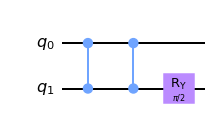

In [21]:
from qiskit import *
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt

# Circuit for e1
circ = QuantumCircuit(2)
circ.cz(0, 1)
circ.cz(0, 1)
circ.ry(np.pi/2, 1)

e1 = Operator(circ.reverse_bits()).data
print(Pi(e1))

circ.draw('mpl')

[0.25, 0.25, -0.25, -0.25]


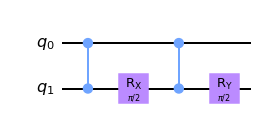

In [22]:
#Circuit for e2
circ = QuantumCircuit(2)
circ.cz(0, 1)
circ.rx(np.pi/2, 1)
circ.cz(0, 1)
circ.ry(np.pi/2, 1)

e2 = Operator(circ.reverse_bits()).data
print(Pi(e2))

circ.draw('mpl')

[0.49999999999999994, 0.0, 0.0, -0.5]


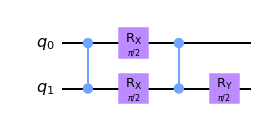

In [23]:
#Circuit for e3
circ = QuantumCircuit(2)
circ.cz(0, 1)
circ.rx(np.pi/2, [0, 1])
circ.cz(0, 1)
circ.ry(np.pi/2, 1)

e3 = Operator(circ.reverse_bits()).data
print(Pi(e3))

circ.draw('mpl')

**Lemma 31.** It is automatic that we have $\Pi(P_\text{CZ}^3) \subseteq \mathfrak{U}_{C_2}$. In order to show that opposite inclusion, we need to supply the necessary realizations (with the necessary mirroring property, as in the proof of Lemma 29). One may check directly that the circuits in Figure 17 will do.

[4.9977595182166055e-17, 3.533949646070575e-17, 0.0, 0.0]


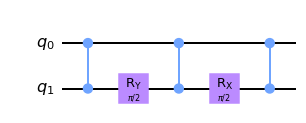

In [27]:
# Circuit for e1
circ = QuantumCircuit(2)
circ.cz(0, 1)
circ.ry(np.pi/2, 1)
circ.cz(0, 1)
circ.rx(np.pi/2, 1)
circ.cz(0, 1)

e1 = Operator(circ.reverse_bits()).data
print(Pi(e1))

circ.draw('mpl')

[0.25000000000000006, 0.25000000000000006, -0.25, -0.25]


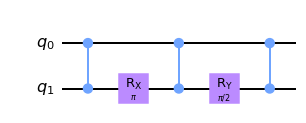

In [28]:
# Circuit for e2
circ = QuantumCircuit(2)
circ.cz(0, 1)
circ.rx(np.pi, 1)
circ.cz(0, 1)
circ.ry(np.pi/2, 1)
circ.cz(0, 1)

e2 = Operator(circ.reverse_bits()).data
print(Pi(e2))

circ.draw('mpl')

[0.5, 4.7964265002741184e-17, 0.0, -0.5]


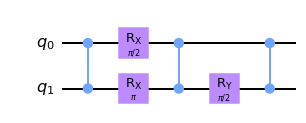

In [29]:
# Circuit for e3
circ = QuantumCircuit(2)
circ.cz(0, 1)
circ.rx(np.pi/2, 0)
circ.rx(np.pi, 1)
circ.cz(0, 1)
circ.ry(np.pi/2, 1)
circ.cz(0, 1)

e3 = Operator(circ.reverse_bits()).data
print(Pi(e3))

circ.draw('mpl')

[0.25, 0.25, 0.25, -0.75]


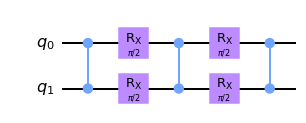

In [30]:
# Circuit for e4
circ = QuantumCircuit(2)
circ.cz(0, 1)
circ.rx(np.pi/2, 0)
circ.rx(np.pi/2, 1)
circ.cz(0, 1)
circ.rx(np.pi/2, 0)
circ.rx(np.pi/2, 1)
circ.cz(0, 1)

e4 = Operator(circ.reverse_bits()).data
print(Pi(e4))

circ.draw('mpl')

[0.375, 0.375, -0.125, -0.625]


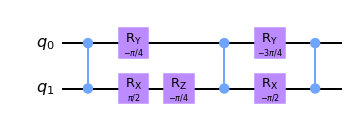

In [35]:
# Circuit for e5
circ = QuantumCircuit(2)
circ.cz(0, 1)
circ.ry(-np.pi/4, 0)
circ.rx(np.pi/2, 1)
circ.rz(-np.pi/4, 1)
circ.cz(0, 1)
circ.ry(-3*np.pi/4, 0)
circ.rx(-np.pi/2, 1)
circ.cz(0, 1)

e5 = Operator(circ.reverse_bits()).data
print(Pi(e5))

circ.draw('mpl')

**Corollary 35.** The expected circuit depth for $CZ$ is $\langle\mathcal{L}_\text{CZ}\rangle = 3$.

#### 4.2 The $i\text{SWAP}$ gate

Now we prove analogous results for the gate set $S = \{iSWAP\}$. We will be briefer in the aspects that exactly mimic those for the gate $\text{CZ}$.

The sets $\Pi(P_{i\text{SWAP}}^0) $ and $\Pi(P_{i\text{SWAP}}^1) $ are again singletons:

$$ \Pi(P_{i\text{SWAP}}^0)  = e_1 , \quad \Pi(P_{i\text{SWAP}}^1)  = e_3 .$$

**Lemma 36.** $\Pi(P_\text{iSWAP}^2)$ is described by

$$\Pi(P_{i\text{SWAP}}^2) - \{\delta_\ast \in \mathfrak{U}_{C_2} \ | \ \delta_1 = -\delta_4, \delta_2 = -\delta_3\}.$$

The extremal points of $\Pi(P_{i\text{SWAP}}^2) $ are $\{e_1, e_2, e_3$ with circuit realizations given as Figure 18.

*Proof.* This proof entirely mimics that of Lemma 29, but this time the relevant quantum Littlewood-Richardson coefficients are 

$$N^{(2, 0), 0}_{(0, 0), (2, 0)} (2, 2) = 1, \quad N^{(1, 1), 0}_{(1, 0), (2, 1)}(2, 2)=1.$$

[0.0, 0.0, 0.0, 0.0]


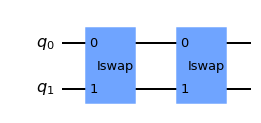

In [42]:
# Circuit for e1
circ = QuantumCircuit(2)
circ.iswap(0, 1)
circ.iswap(0, 1)

e1 = Operator(circ.reverse_bits()).data
print(Pi(e1))

circ.draw('mpl')

[0.25, 0.25, -0.25, -0.25]


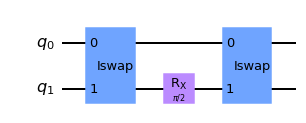

In [43]:
# Circuit for e2
circ = QuantumCircuit(2)
circ.iswap(0, 1)
circ.rx(np.pi/2, 1)
circ.iswap(0, 1)

e2 = Operator(circ.reverse_bits()).data
print(Pi(e2))

circ.draw('mpl')

[0.5, 0.0, 0.0, -0.5]


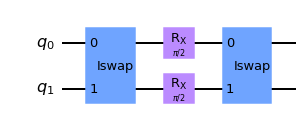

In [45]:
# Circuit for e3
circ = QuantumCircuit(2)
circ.iswap(0, 1)
circ.rx(np.pi/2, 0)
circ.rx(np.pi/2, 1)
circ.iswap(0, 1)

e3 = Operator(circ.reverse_bits()).data
print(Pi(e3))

circ.draw('mpl')

**Lemma 37.** $\Pi(P_{i\text{SWAP}}^3) = \mathfrak{U}_{C_2}$, with realizations of the extremal vertices as circuits given in Figure 19.

Proof. Again, the proof is almost identical to that of Lemma 31.|

[0.0, 0.0, 0.0, -5.551115123125783e-17]


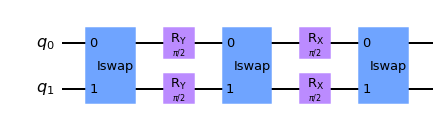

In [46]:
# Circuit for e1
circ = QuantumCircuit(2)
circ.iswap(0, 1)
circ.ry(np.pi/2, 0)
circ.ry(np.pi/2, 1)
circ.iswap(0, 1)
circ.rx(np.pi/2, 0)
circ.rx(np.pi/2, 1)
circ.iswap(0, 1)

e1 = Operator(circ.reverse_bits()).data
print(Pi(e1))

circ.draw('mpl')

[0.25, 0.25, -0.24999999999999994, -0.25]


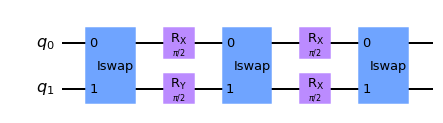

In [47]:
# Circuit for e2
circ = QuantumCircuit(2)
circ.iswap(0, 1)
circ.rx(np.pi/2, 0)
circ.ry(np.pi/2, 1)
circ.iswap(0, 1)
circ.rx(np.pi/2, 0)
circ.rx(np.pi/2, 1)
circ.iswap(0, 1)

e2 = Operator(circ.reverse_bits()).data
print(Pi(e2))

circ.draw('mpl')

[0.5, 0.0, 0.0, -0.5]


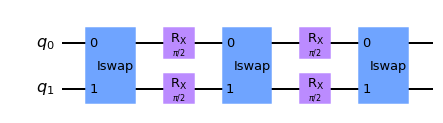

In [48]:
# Circuit for e3
circ = QuantumCircuit(2)
circ.iswap(0, 1)
circ.rx(np.pi/2, 0)
circ.rx(np.pi/2, 1)
circ.iswap(0, 1)
circ.rx(np.pi/2, 0)
circ.rx(np.pi/2, 1)
circ.iswap(0, 1)

e3 = Operator(circ.reverse_bits()).data
print(Pi(e3))

circ.draw('mpl')

[0.25000000000000006, 0.24999999999999997, 0.24999999999999997, -0.75]


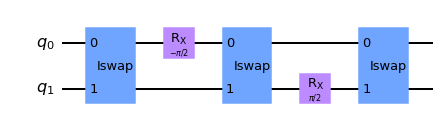

In [49]:
# Circuit for e4
circ = QuantumCircuit(2)
circ.iswap(0, 1)
circ.rx(-np.pi/2, 0)
circ.iswap(0, 1)
circ.rx(np.pi/2, 1)
circ.iswap(0, 1)

e4 = Operator(circ.reverse_bits()).data
print(Pi(e4))

circ.draw('mpl')

[0.375, 0.375, -0.125, -0.625]


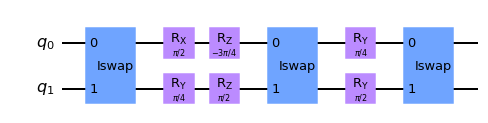

In [170]:
# Circuit for e5
circ = QuantumCircuit(2)
circ.iswap(0, 1)

circ.rx(np.pi/2, 0)
circ.rz(-3*np.pi/4, 0)

circ.ry(np.pi/4, 1)
circ.rz(np.pi/2, 1)

circ.iswap(0, 1)

circ.ry(np.pi/4, 0)

circ.ry(np.pi/2, 1)

circ.iswap(0, 1)

e5 = Operator(circ.reverse_bits()).data
print(Pi(e5))

circ.draw('mpl')

*Remark 38.* Combining the results above with those from the previous subsection, we conclude

$$P_\text{CZ}^2 = P_{i\text{SWAP}}, \quad P_\text{CZ}^3 = P_{i\text{SWAP}}^3.$$

**Corollary 39.** The expected circuit depth for $i\text{SWAP}$ is $\langle\mathcal{L}_{i\text{SWAP}}\rangle = 3$.

**Lemma 42.** The set $\Pi(P_{i\text{SWAP,CZ}}^2)$ is the union of $\Pi(P^2_{i\text{SWAP}})$ and the convex polytope

$$\{\delta_\ast = (\delta_1, \delta_2, \delta_3, \delta_4) \in \mathfrak{U}_{C_2} \ | \ \delta_1 = 1/2-\delta_2, \delta = -1/2 - \delta_3 \}.$$

which has extremal vertices $\{e_2, e_3, e_4\}$. What probably happens, is that we have two planes, one passing through the $\{e_1, e_2, e_3\}$ and the other one passing through $\{e_2, e_3, e_4\}$. Then we can apply the convex hull for each of these planes.

**Corollary 43.** The expected depth for the gate set with CZ and $i$SWAP is $\langle \mathcal{L}_{\text{CZ}, i\text{SWAP}} \rangle = 3.$

*Remark 44.* The metrics $\langle \mathcal{L}_\mathcal{S}$ \rangle capture the efficacy of $\mathcal{S}$ at encoding *random* two-qubit programs, but programs appearing "in the wild" (as well as subprograms appearing as components in decompositions) are not random: the program $\text{SWAP} \in PU(4)$ is a prime example of an uncommonly importantn two-qubit interaction. Althought the equation

$$\langle\mathcal{L}_\text{CZ}\rangle = \langle \mathcal{L}_{i\text{SWAP}}\rangle = \langle \mathcal{L}_{\text{CZ}, i\text{SWAP}}\rangle$$

indicates that there is no salient difference between these two different gate sets from the perspective of random programs,

$$\text{SWAP} \in P^2_{\text{CZ}, i\text{SWAP}} \setminus P^2_\text{CZ}$$

indicates that there is an important difference from the persepctive of structured programs.

**Lemma 45.** For a point

$$\delta_\ast \in \Pi(P_{i\text{SWAP}, \text{CZ}}^2) \setminus \Pi(P^2_{i\text{SWAP}}),$$

there are two entries satisfying

$$-1/4 \leq \delta_i \leq \delta_j \leq 1/4.$$

Setting $\alpha = (\delta_i+\delta_j)\pi$ and $\beta = (\delta_i - \delta_j) \pi$, we then have

$$\delta_\ast = \Pi(\text{CZ} \cdot (Y_\alpha \otimes Y_\beta) \cdot i\text{SWAP})).$$

#### 4.3 The $\text{CPHASE}$ and $\text{PSWAP}$ gate families

We have

$$\text{CPHASE}(\theta) = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{pmatrix}, \quad \text{PSWAP}(\theta) = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & e^{i\theta} & 0 \\ 0 & e^{i\theta} & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}.$$

For completeness, note that 

$$\text{CPHASE}(\pi) = \text{CZ}, \quad \text{PSWAP}(0) = \text{SWAP}, \quad \text{PSWAP}(\pi/2) = i\text{SWAP}.$$

**Lemma 46.** The convex polytope $\Pi(P^2_\text{CPHASE})$ agrees with $\Pi(P^2_\text{CZ})$ and with $\Pi(P_{i\text{SWAP}}^2).$

*Proof.* The proof is identical to that given for Littlewood-Richardson coefficients imposed the same symmetry relation on $\Pi(P_\text{CPHASE}^2)$, and the reverse inclusion then follows from $P^2_\text{CZ} \subseteq P_\text{CPHASE}^2$.

$$N^{(2,0), 0}_{(1, 0)(1, 0)} (2, 2) = 1, \quad N^{(1, 1), 0}_{(1, 0)(1, 0)}(2, 2) = 1.$$

Specifically, the monodromy coordinates of $\text{CPHASE}(\theta)$ has the form 

$$\Pi(\text{CPHASE}(\theta)) = (f(\theta), f(\theta), -f(\theta), -f(\theta)).$$

We apply Theorem 23 to deduce the inequalities 

$$0 - (\alpha_{2+1-1} + \alpha_{2+2-0}) - (\beta_{2+1-1} + \beta_{2+2-0}) + (\delta_{2+1-2} + \delta_{2+2-0}) \geq 0,$$

$$0 - (\alpha_{2+1-1} + \alpha_{2+2-0}) - (\beta_{2+1-1} + \beta_{2+2-0}) + (\delta_{2+1-1} + \delta_{2+2-1}) \geq 0,$$

We deduce that $\delta_1+\delta_4 = 0$ and $\delta_2+\delta_3 = 0$.


**Corollary 47.** The expected circuit depth for $\text{CPHASE}$ is $\langle \mathcal{L}_\text{CPHASE}\rangle = 3$.

Similarly, there is no substantial gain from mixing $\text{CPHASE}$ with $i\text{SWAP}$ over $\text{CZ}$ with $i\text{SWAP}$.

**Lemma 48.** $P^2_{\text{CZ}, i\text{SWAP}} = P^2_{\text{CPHASE}, i\text{SWAP}}$, and $\langle \mathcal{L}_{\text{CPHASE}, i\text{SWAP}}\rangle = 3.$

*Example 49.* As an exercise in the application of these methods, we provide an analysis of the polytopes associated to $\sqrt{\text{CZ}} = \text{CPHASE}_{\frac{\pi}{2}}.$ Since $\sqrt{\text{CZ}} \cdot \sqrt{\text{CZ}} = \text{CZ}$, we can deduce immediately from Corollary 35 that $\langle \mathcal{L}_\sqrt{\text{CZ}}\rangle \leq 6$. We enumerate the vertices of the sets $\Pi(P^n_\sqrt{\text{CZ}})$ for $n<5$ in Figure 20, as displayed in graphical form in Figure 6. These yield the exact calculation

$$\langle \mathcal{L}_\sqrt{\text{CZ}}\rangle^{\mathfrak{U}_{C_2}} = 3\cdot \frac{1}{2} + 4\cdot \frac{1}{3} + 5\cdot \frac{7}{48} + 6\cdot \frac{1}{48} = 3.6875,$$

a considerable improvement over the naive estimate.

For completeness, we include a calculation of $P^2_\text{PSWAP}$.

**Lemma 50.** $P^2_\text{PSWAP}$ agrees with the other depth-two sets studied so far:

$$P^2_\text{PSWAP} = P^2_{i\text{SWAP}} = P^2_\text{CZ} = P^2_\text{CPHASE}.$$

*Proof.* This proof proceeds similarly to that of Lemma 36. This time the relevant quantum Littlewood-Richardson coefficients are

$$N^{(2, 0), 1}_{(2, 1)(2, 1)} (2, 2)=1 , \quad N^{(1, 1), 1}_{(2, 1)(2, 1)}(2, 2) = 1.$$

and $\Pi(\text{PSWAP}_{2\pi t})$ is calculated to be

$$\left( \frac{3}{4} - \frac{t}{2}, -\frac{1}{4} + \frac{t}{2}, -\frac{1}{4} + \frac{t}{2}, -\frac{1}{4}-\frac{t}{2}\right).$$

An appication of Theorem 23 yields the inequalities which enforce the same symmetry conditions on $\Pi(P^2_\text{PSWAP})$ as in the previous Lemmas. Because we have $P^2_{i\text{SWAP}} \subseteq P^2_\text{PSWAP}$, we may conclude the equality.

**Corollary 51.** The expected circuit depth for $\text{PSWAP}$ is $\langle \mathcal{L}_\text{PSWAP}\rangle = 3.$

### 5. Monodromy polytope slices for the $\text{XY}$ family

Combining the ideas which motivated $i\text{SWAP}$ and $\text{CPHASE}$, we are also motivated to consider the one-parameter family of native two qubit gates given by

$$\text{XY}_\alpha = \exp(-i\alpha \cdot (\sigma_X^{\otimes 2} + \sigma_Y^{\otimes 2})) = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & \cos(\alpha/2) & -i\sin(\alpha/2) & 0 \\ 0 & -i\sin(\alpha/2) & \cos(\alpha/2) & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}.$$

This family is interesting for a few reasons: it is one of the only remaining "edges" of $\mathfrak{U}$; it can arise naturally as a gate natively available to systems where $i\text{SWAP}$ is available, and it itself belongs to the canonical family. Having noted that $\text{XY}_\alpha$ belongs to the canonical family, we may compute its associated diagonal coordinates to be

$$\text{XY}_\alpha^Q = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & e^{i\alpha/2} & 0 & 0 \\ 0 & 0 & e^{-i\alpha/2} & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix},$$

$$\Pi(\text{XY}_\alpha) = \left(\frac{\alpha}{2\pi}, 0, 0, -\frac{\alpha}{2\pi}\right).$$

In pursuit of an analogue of the results of Section 4.3, we can perform an analysis of the polytope $\Pi(P^2_{\text{XY}}).$ The computation is much more involved, but we are rewarded with the follwoing theorem:

**Theorem 52.** The set $\Pi(P^2_\text{XY})$ is the union of the polytopes with extremal coordinates as specified in Figure 21. The set $\Pi(P^3_\text{XY})$ is the entire solid $\mathfrak{U}_{C_2}$.

*Proof.* We compute along the lines of Remark 30: we intersect the monodromy polytope with the hyperplane equations specifying that the first coordinate take the form $(\alpha_1, 0, 0, -\alpha_1)$ and that the second coordinate take the form $(\beta_1, 0, 0, -\beta_1)$; then we apply Fourier-Motzkin elimination to project to the third coordinate; and finally we feed the resulting system to software package $lrs$. Altogether, this results in the vertex set listed above.

**Corollary 53.** In particular, $\Pi(P^2_\text{XY})$ is of positive volume. More precisely, we compute the expected gate depth for $\text{XY}$ to be

$$\langle \mathcal{L}_\text{XY}\rangle^{\mathfrak{U}_{C_2}} = 2\cdot \frac{5}{6} + 3\cdot \frac{1}{6} = \frac{13}{6}.$$

*Remark 54.* As an interesting aside, $\text{SWAP}$ lies outside of this polytope.

Our main observation is that $\text{XY}$ enjoys a property that none of the other gate sets have thus far: $P^2_\text{XY}$ is top-dimensional or, said otherwise, has positive volume. In the $\text{CPHASE}$ family, we found in Lemma 46 that $P^2_\text{CPHASE}$ had zero volume, from which we can also conclude that $P^2_{\text{CPHASE}_\alpha}$ has zero volume for every fixed of $\alpha$, including $\text{CPHASE}_\pi = \text{CZ}$. we here pursue the corresponding question of whether there are any fixed values of $\alpha$ for which $P^2_\text{XY}$ has nonzero volume. In the event that such slices exist, we can ask an additional question: which particular values of $\alpha$ maximize the volume of the slice?

Fix $\leq \alpha < \pi$ with corresponding value $t = \alpha/\pi$ satisfying $0\leq t<1$. The fundamental alcove sequences under consideration are then

$$\alpha_\ast = (t/2, 0, 0, -t/2),$$
$$\beta_\ast = (t/2, 0, 0, -t/2),$$
$$\delta_\ast = (\delta_1 \geq \delta_2 \geq \delta_3 \geq \delta_4),$$

and the inequalities given by combining Theorem 23 with Figure 14 adn the above alcove sequences are

\begin{align}\delta_4  + t &\geq 0, \quad \delta_3 + \delta_4 + t\geq 0, \\
-\delta_1 + t&\geq 0, \quad \delta_4 + t/2 \geq 0, \\
\delta_1 + \delta_4 + t/2 &\geq 0, \quad -\delta_2 + t/2 \geq 0, \\
\delta_2 &\geq 0, \quad \delta_1 + \delta-4 -t \geq -1, \\
-\delta_3 &\geq 0, \quad \delta-4 -t/2 \geq -1, \\
\delta_2 + \delta_3 -t &\geq -1, \quad -\delta_1 -t/2 \geq -1\end{align}

From these inequalities, we may draw the following consequence:

**Theorem 55.** the volume of $\Pi(P^2_{\text{XY}_\alpha})$ is maximized at $\alpha = 3\pi/4.$

*Proof.* Because the finite family of inequalities determining $\Pi(P^2_\text{XY})$ are linearly dependent in $\alpha$, the curve $\text{vol}\Pi(P^2_{\text{XY}_\alpha})$ piecewise cubic in $\alpha$. One can use this fact, together with sampling and interpolation techniques, to determine a formula for $\text{vol}\Pi(P^2_{\text{XY}_\alpha})$:

$$\text{vol}\Pi(P^2_{\text{XY}_\alpha}) = \begin{cases} 4t^3 &\quad 0 \leq t \leq \frac{1}{2} \\
\frac{15}{2}-36t+60t^2 -32t^3 &\quad \frac{1}{2}\leq t \leq \frac{3}{4} \\  -6+18t-12t^2 &\quad \frac{3}{4} \leq t\leq 1\end{cases},$$

as depicted in Figure $8$. From this curve, we may directly determine its maximum value.

**Definition 56.** Motivated by Theorem 55, we also refer to $\text{XY}_\frac{3\pi}{4}$ by the briefer synonym $\text{DB}$.

*Remark 57.* Similarly, one may compute $\Pi(P^3_\text{DB}) = \mathfrak{U}_{C_2}$, from whcih we conclude

$$\langle \mathcal{L}_\text{DB}\rangle^{\mathfrak{U}_{C_2}} = 2\cdot \frac{1}{2} + 3\cdot \frac{1}{2} = \frac{5}{2}.$$

*Remark 58.*

For $0\leq \alpha \leq \alpha^\prime\leq 3\pi/4$, there is an inclusion of solids $\Pi(P^2_{\text{XY}_\alpha}) \subseteq \Pi(P^2_{\text{XY}_{\alpha^\prime}})$, from which it follows that $\text{vol}\Pi(P^2_\text{DB}) \geq \text{vol}\Pi(P^2_{\text{XY}_\alpha})$ for any $0\leq \alpha \leq 3\pi/4$ as in the Theorem. However, for $e\pi/4 \leq \alpha <\alpha^\prime$, neither of $\Pi(P^2_{\text{XY}_\alpha})$ and $\Pi(P^2_{\text{XY}_{\alpha^\prime}})$, neither of $\Pi(P^2_{\text{XY}_\alpha})$ and $\Pi(P^2_{\text{XY}_{\alpha^\prime}})$ is contained in the other: although $\Pi(P^2_{\text{XY}_\alpha})$ continues to lose volume as $\alpha$ approaches $\pi$ from the left, the solid also continues to pick up "new" two-qubit programs as it shrinks.

**Lemma 59.** $\Pi(P^2_\text{DB})$ is a union of two convex polytopes, respectively described the following two families of inequalities:

$$\{\delta_2\geq 0, \frac{1}{4}\geq |\delta_2 + \delta_3|, 0\geq \delta_3\},$$

$$\{\frac{1}{2} \geq \delta_1 + \delta_2 + \delta_3, -\frac{1}{4} + \delta_1 + \delta_2 \geq 0, \frac{1}{4} \geq |\delta_2 + \delta_3| \}$$

intersected with teh fundamental alcove. The extremal points can be found in Figure 22.

*Proof.* Here we follow the method espoused by Remark 30. The family of inequailities comes directly from reducing the family supplied by Theorem 23. After calculating all the points of intersection of the associated equalities and discarding those intersection points which do not satisfy all of the inequalities, the remainder is the set of extremal vertices, as listed above.

*Remark 62.* For the course of our analysis of $\langle \mathcal{L}_\text{XY}\rangle{\mathfrak{U}_{C_2}}$, we have avoided giving an effective compilation routine for $P^2_\text{XY}$ along the lines of Remark 34 for $P^3_\text{CZ}$. Indeed, one can show under mild hypotheses that such a formula cannot exist. The canonical family forms a $3$-dimensional maximal torus in $PU(4)$, but the maximal tori in $PU(2)^\otimes 2$ are merely 2-dimensional. It is therefore impossible for any gates $S \in PU(4)$ to conjugate a family of local gates onto the canonical family. If $S^\dagger$ is additionally locally equivalent to $S$, then this means that the analogue of Remark 34 for $P^2_S$ must be instead of the form 

$$\text{CAN}(\alpha, \beta, \delta) = (C\otimes F) \cdot S^\dagger (B\otimes E) \cdot S \cdot (A\otimes D).$$

where the outer gates $A, C, D$ and $F$ are not all constant in the parameters $\alpha$, $\beta$, $\delta$. In practice it seems that $B$ and $E$ cannot be made linearly dependent on the canonical parameters either, though we do not presently have a proof of this to offer.